# Cho dữ liệu mamals.csv chứa thông tin về mammals

## Phân tích thông tin sơ bộ về dữ liệu trên hai thuộc tính BrainWt, BodyWt, xem xét môi quan hệ của 2 thuộc tính này. Trực quan hóa dữ liệu

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('./mammals.csv')
df.head()

,Unnamed: 0,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [27]:
df.describe()

,Unnamed: 0,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
count,62.000000,62.000000,62.000000,48.000000,50.000000,58.000000,58.000000,58.000000,62.000000,62.000000,62.000000
mean,31.500000,198.789984,283.134194,8.672917,1.972000,10.532759,19.877586,142.353448,2.870968,2.419355,2.612903
std,18.041619,899.158011,930.278942,3.666452,1.442651,4.606760,18.206255,146.805039,1.476414,1.604792,1.441252
min,1.000000,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,16.250000,0.600000,4.250000,6.250000,0.900000,8.050000,6.625000,35.750000,2.000000,1.000000,1.000000
50%,31.500000,3.342500,17.250000,8.350000,1.800000,10.450000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,46.750000,48.202500,166.000000,11.000000,2.550000,13.200000,27.750000,207.500000,4.000000,4.000000,4.000000
max,62.000000,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


In [28]:
brain_wt = df.BrainWt
body_wt = df.BodyWt

In [29]:
brain_range = np.ptp(brain_wt)
brain_range

5711.86

In [30]:
body_range = np.ptp(body_wt)
body_range

6653.995

### Nhận xét: có 1 khoản lớn giữa min và max

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

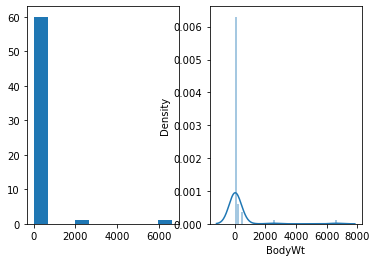

In [35]:
plt.subplot(1, 2, 1)
plt.hist(body_wt)

plt.subplot(1, 2, 2)
sns.distplot(body_wt)
plt.show()

In [37]:
body_wt.skew()

6.563608062833757

In [39]:
body_wt.kurtosis()

45.74102025601449

### Nhận xét
* Skewness lớn hơn 0, phân phối lệch phải
* Kurtosis lớn hơn > 3, phân phối nhọn

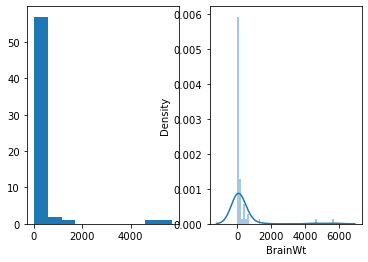

In [41]:
plt.subplot(1, 2, 1)
plt.hist(brain_wt)

plt.subplot(1, 2, 2)
sns.distplot(brain_wt)
plt.show()

In [42]:
brain_wt.skew()

5.071589456939673

In [43]:
brain_wt.kurtosis()

26.270581235350292

### Nhận xét:
* Skewness lớn hơn 0, phân phối lệch phải
* Kurtosis lớn hơn 3, phân phối nhọn

## Để dự đoán BrainWt dựa trên BodyWt cần phải kiểm tra và chuẩn hóa dữ liệu. Hãy chọn mộ phương pháp để chuyển hóa dữ liệu dựa trên thông tin nêu trên. Trực quan hóa dữ liệu sau khi chuẩn hóa.

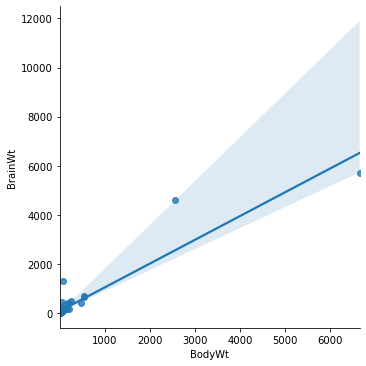

In [48]:
sns.lmplot(data=df, x='BodyWt', y='BrainWt')

### Nhận xét:
* Có khả năng quan hệ tuyến tính
* Chọn phương pháp chuẩn hóa là log normalization

In [50]:
df['BodyWt_log'] = np.log(body_wt)
df['BrainWt_log'] = np.log(brain_wt)
body_wt_log = df['BodyWt_log']
brain_wt_log = df['BrainWt_log']
df.head()

,Unnamed: 0,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,BodyWt_log,BrainWt_log
0,1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,8.802973,8.650325
1,2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.000000,1.887070
2,3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,1.219354,3.795489
3,4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,-0.083382,1.740466
4,5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,7.842671,8.434464


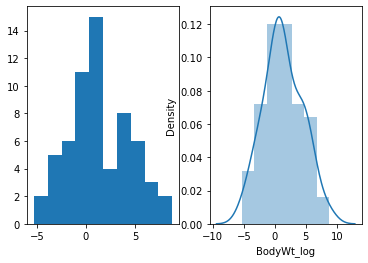

In [51]:
plt.subplot(1, 2, 1)
plt.hist(body_wt_log)

plt.subplot(1, 2, 2)
sns.distplot(body_wt_log)
plt.show()

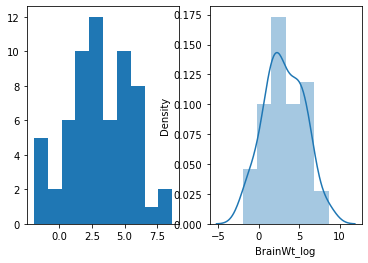

In [52]:
plt.subplot(1, 2, 1)
plt.hist(brain_wt_log)

plt.subplot(1, 2, 2)
sns.distplot(brain_wt_log)
plt.show()

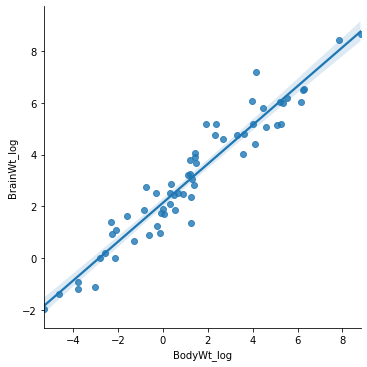

In [53]:
sns.lmplot(data=df, x="BodyWt_log", y="BrainWt_log")